# Dataset

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

C:\Users\HP DEMO\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\HP DEMO\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load data set

dta=sm.datasets.fair.load_pandas().data
dta.to_csv('affair.csv')
#add affair column: 1 represents having affairs, 0 represents not
dta['affair']=(dta.affairs>0).astype(int)
dta.to_csv('affair12.csv')

In [3]:
dta.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
4499,5.0,27.0,2.5,1.0,3.0,16.0,4.0,2.0,0.000000,0
2567,5.0,22.0,2.5,0.0,2.0,12.0,3.0,4.0,0.000000,0
5789,5.0,32.0,16.5,4.0,3.0,14.0,4.0,6.0,0.000000,0
1648,3.0,27.0,9.0,1.0,1.0,14.0,3.0,6.0,4.666666,1
1043,4.0,27.0,9.0,0.0,1.0,12.0,3.0,5.0,2.177776,1


#calculation-> LinRegress LogisticRegression 

In [4]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [5]:
# show plts in the notebook
%matplotlib inline

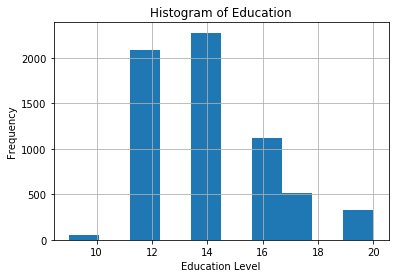

In [6]:
# histogram of education

dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

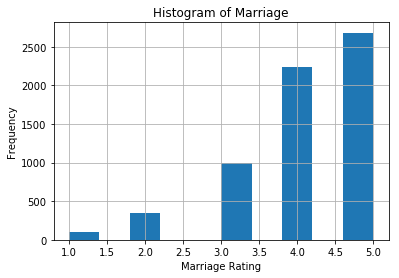

In [7]:
# histogram of education

dta.rate_marriage.hist()
plt.title('Histogram of Marriage')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

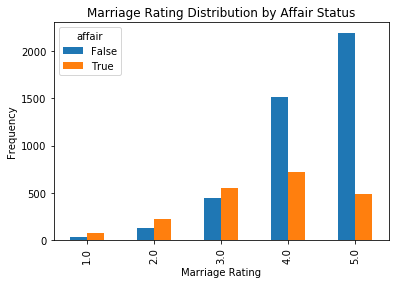

In [8]:
pd.crosstab(dta.rate_marriage,dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

affair       False  True 
yrs_married              
0.5            354     16
2.5           1595    439
6.0            754    387
9.0            348    254
13.0           347    243
16.5           449    369
23.0           466    345


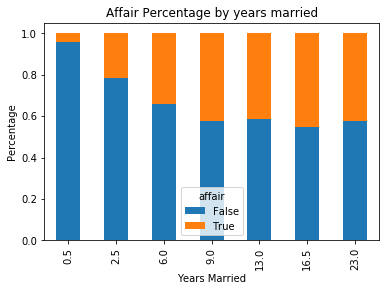

In [9]:
affair_yrs_married=pd.crosstab(dta.yrs_married,dta.affair.astype(bool))
print(affair_yrs_married)

affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by years married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')


In [10]:
#create dataframes with  an intercept column and dummy variable for 
# occupation and occupation_husb
y,X  = dmatrices ('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) +C(occupation_husb)',dta ,return_type='dataframe')
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [11]:
print(type(y))
y=np.ravel(y)

print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [12]:
model=LogisticRegression()
model.fit(X,y)
#check accuracy of trainig set
model.score(X,y)

0.72588752748978946

In [13]:
y.mean()

0.32249450204209867

# Model evaluation using a validation set

In [14]:
# evaluate the model by splitting into train test sets
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
#predict class tables for the test set

predicted=model2.predict(X_test)
print(predicted)

[ 1.  0.  0. ...,  0.  0.  0.]


In [16]:
# generate class probabilities

probs=model2.predict_proba(X_test)
print(probs)

[[ 0.3514634   0.6485366 ]
 [ 0.90955084  0.09044916]
 [ 0.72567333  0.27432667]
 ..., 
 [ 0.55727385  0.44272615]
 [ 0.81207043  0.18792957]
 [ 0.74734601  0.25265399]]


In [17]:
# generate evaluation Matries
print(metrics.accuracy_score(y_test,predicted))
# compute area under the reciever operating characterstics curve (ROC AUC) from prediction scores
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.729842931937
0.745950606951


In [18]:
print(metrics.confusion_matrix(y_test,predicted))

[[1169  134]
 [ 382  225]]


# Model Evaluation Using Cross Validation

In [19]:
# evaluate the model using 10-fold cross-validation
scores  = cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
print(scores)
print("------------------------------")
print(scores.mean())

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
------------------------------
0.724163068551


In [22]:
model.predict_proba(np.array([1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]).reshape(1,-1))

array([[ 0.77472221,  0.22527779]])